In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Traffic forecast 
-P.Viswanadh

In [2]:
df=pd.read_csv("Train_fb.csv")

In [3]:
df.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
from prophet import Prophet

# Preprocessing

In [5]:
df["Datetime"]=pd.to_datetime(df["Datetime"],format="%d-%m-%Y %H:%M")

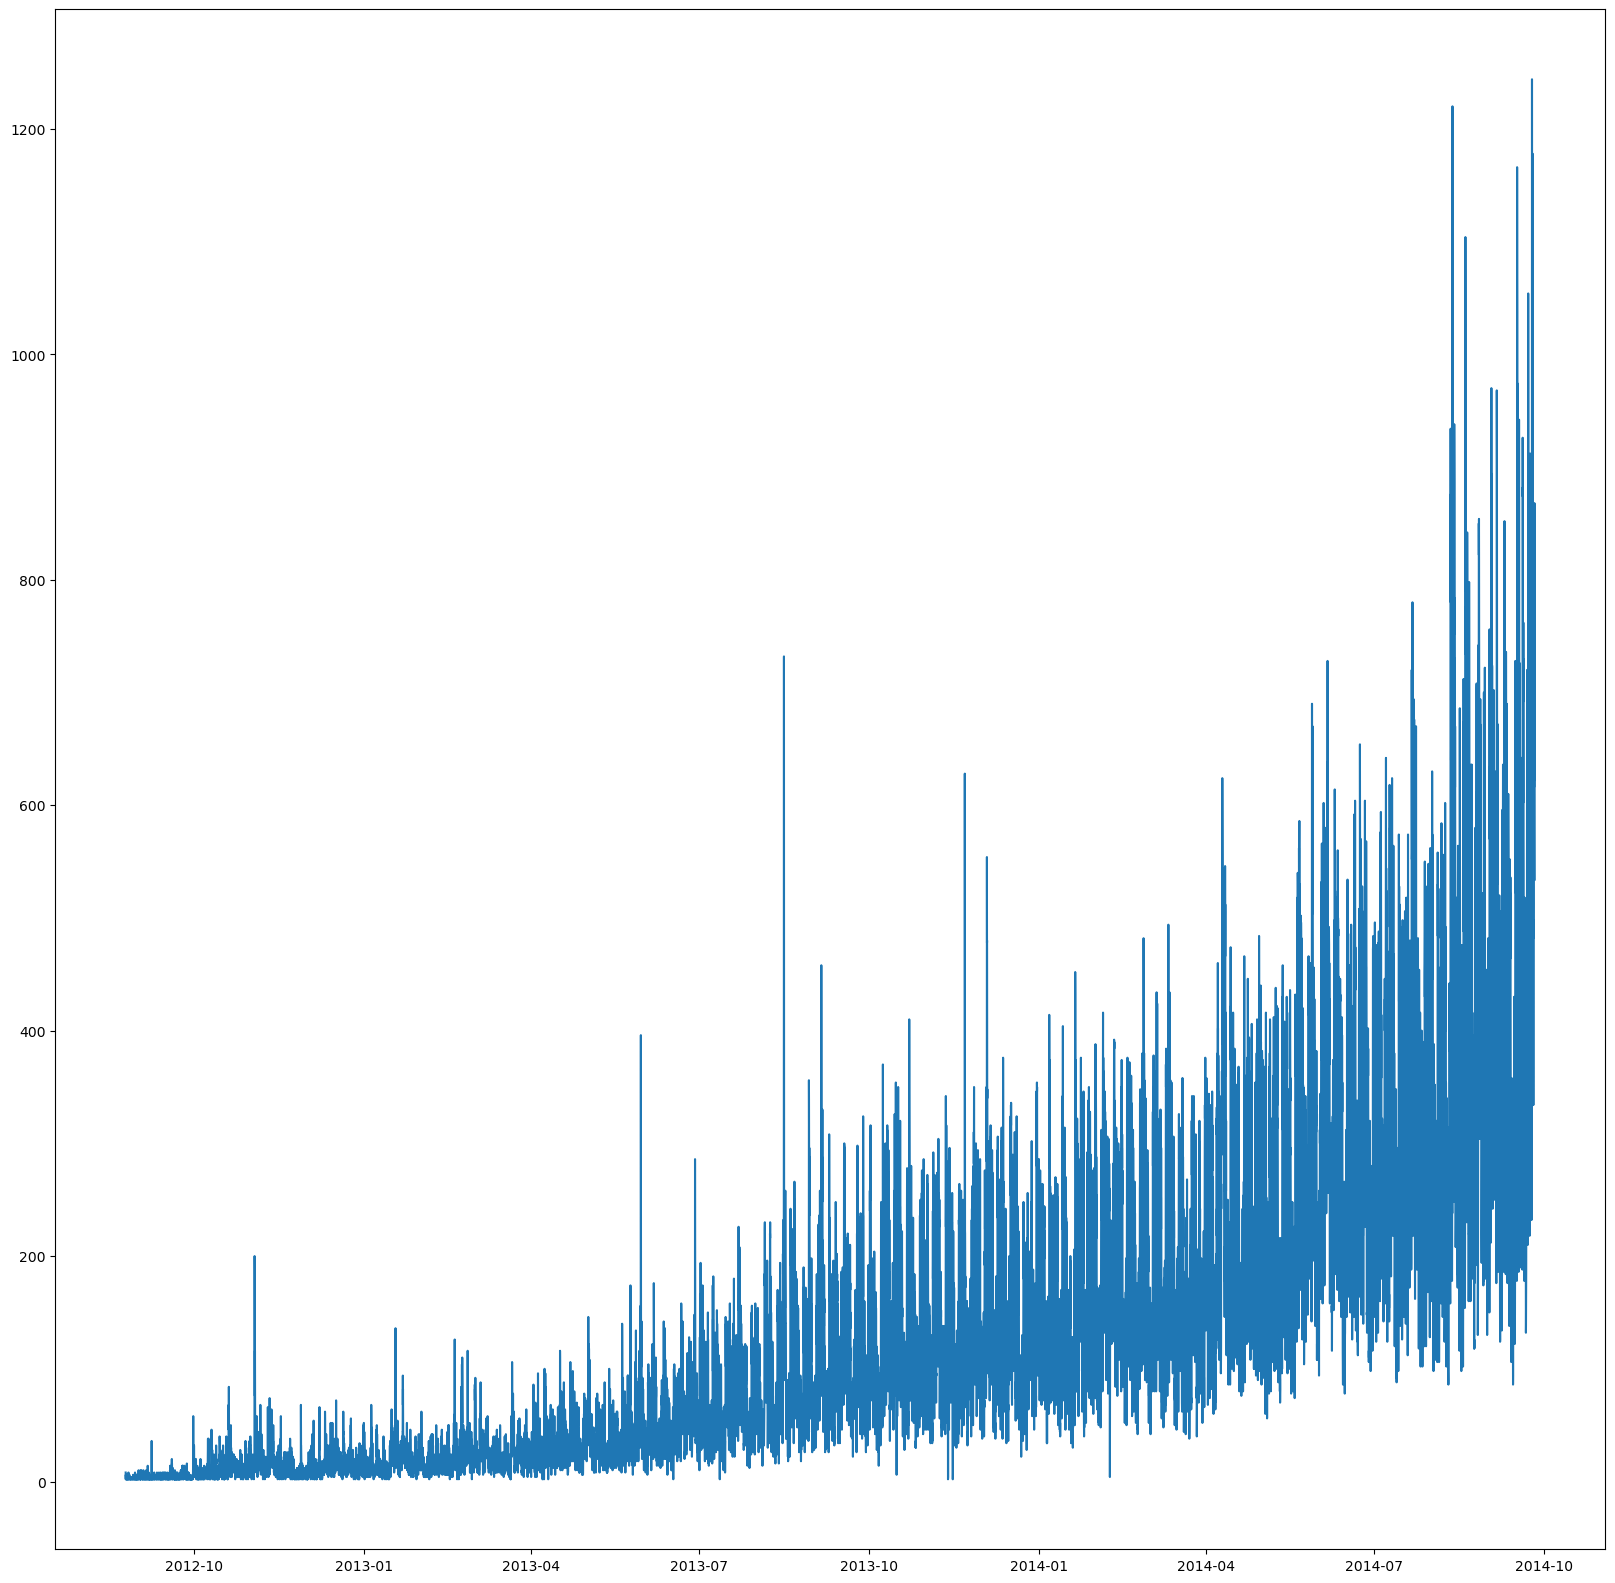

In [6]:
plt.figure(figsize=(20,20))
plt.plot(df["Datetime"],df["Count"])

In [7]:
df.index=df['Datetime']
df['y']=df['Count']
df.drop(columns=['Count','Datetime','ID'],axis=1,inplace=True)

In [8]:
df.head(5)

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [9]:
df=df.resample('D').sum()

In [10]:
df.head(5)

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [11]:
len(df)

762

In [12]:
model_p=Prophet()

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
df.reset_index(inplace=True)

In [14]:
df.rename(columns={'Datetime':'ds','y':'y'},inplace=True)

In [15]:
df.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [16]:
m=model_p.fit(df)

11:40:40 - cmdstanpy - INFO - Chain [1] start processing
11:40:40 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future=m.make_future_dataframe(periods=30)

In [18]:
forecast=m.predict(future)

# Forecasting predictions

<AxesSubplot:>

<Figure size 2000x2000 with 0 Axes>

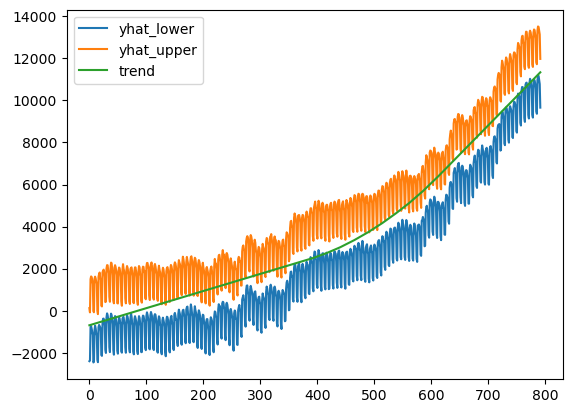

In [19]:
plt.figure(figsize=(20,20))
soothsay=forecast[["yhat_lower","yhat_upper","trend"]]
soothsay.plot(kind="line")

In [20]:
def forecast(days):
    future=m.make_future_dataframe(periods=days)
    forecast=m.predict(future)
    soothsay=forecast[["yhat_lower","yhat_upper","trend"]]
    soothsay.plot(kind="line")
    
    

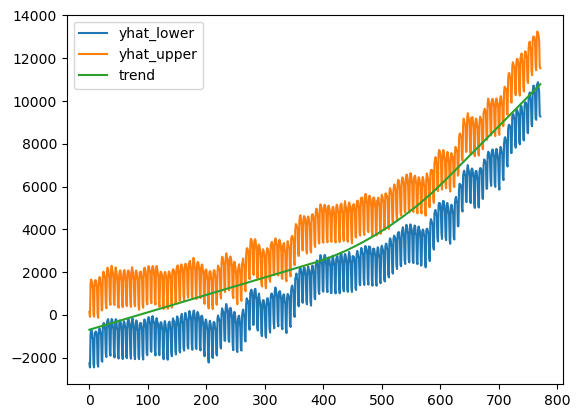

In [21]:
forecast(10)

In [22]:
df.head(10)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60
5,2012-08-30,74
6,2012-08-31,78
7,2012-09-01,112
8,2012-09-02,118
9,2012-09-03,108


In [23]:
df.tail(10)

,ds,y
752,2014-09-16,16080
753,2014-09-17,13676
754,2014-09-18,11000
755,2014-09-19,13034
756,2014-09-20,8186
757,2014-09-21,9102
758,2014-09-22,14116
759,2014-09-23,13304
760,2014-09-24,16856
761,2014-09-25,14152


# Implementing LSTM

In [24]:
df2=df[:750]

In [25]:
df2.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [26]:
df2.drop("ds",axis=1,inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_15028\1533910961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("ds",axis=1,inplace=True)


In [27]:
df2

,y
0,76
1,88
2,62
3,58
4,60
...,...
745,13104
746,11592
747,10180
748,9010


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [29]:
length=25
n_features=1

In [30]:
model=Sequential()
model.add(LSTM(25,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer="adam",loss="mse")

In [32]:
scaled_train=df2[:725]

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
scaled_train=np.asarray(scaled_train)

In [35]:
scaled_train.shape

(725, 1)

In [36]:
scaled_train=scaled_train.reshape(-1,1)

In [37]:
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [38]:
model.fit(generator,epochs=5)

Epoch 1/5
 34/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12143515.0000

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 13751905.0000
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4189032.2500
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5855595.5000
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1851581.0000
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1067235.0000


In [39]:
generator[0]

(array([[[ 76],
         [ 88],
         [ 62],
         [ 58],
         [ 60],
         [ 74],
         [ 78],
         [112],
         [118],
         [108],
         [ 66],
         [104],
         [100],
         [ 68],
         [100],
         [ 68],
         [ 64],
         [ 58],
         [ 84],
         [ 72],
         [ 84],
         [ 92],
         [ 70],
         [ 92],
         [188]]], dtype=int64),
 array([[158]], dtype=int64))

In [40]:
df2.iloc[25]

y    158
Name: 25, dtype: int64

# Time Series Generator has generated the same value

# evaluation

In [41]:
first_eval_batch=scaled_train[-length:]

In [42]:
first_eval_batch

array([[ 6562],
       [ 6094],
       [ 8546],
       [ 8218],
       [ 8498],
       [ 8740],
       [ 9186],
       [ 6278],
       [ 5340],
       [ 8872],
       [ 7724],
       [ 9170],
       [ 8036],
       [ 8406],
       [ 5462],
       [ 5822],
       [12928],
       [14762],
       [14878],
       [ 9672],
       [ 8432],
       [ 7624],
       [ 6750],
       [ 9912],
       [13104]], dtype=int64)

In [43]:
np.shape(first_eval_batch)

(25, 1)

In [44]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [45]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


array([[9629.372]], dtype=float32)

In [46]:
df2.iloc[725]

y    12022
Name: 725, dtype: int64

In [47]:
results=[]
i=25
sliding_set=df2.iloc[701:726]
while i!=0:    
    sliding_set=np.asarray(sliding_set)
    sliding_set=sliding_set.reshape((1,length,n_features))
    ans=model.predict(sliding_set)
    print(ans)
    results.append(ans.tolist()[0][0])
    sliding_set=sliding_set.reshape(-1)
    sliding_set=sliding_set.tolist()
    sliding_set.pop(0)
    sliding_set.append(ans.tolist()[0][0])
    i-=1
    

 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9891.421]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
[[10094.796]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9843.046]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[9918.77]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[9674.429]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9976.505]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9760.37]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[9878.549]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[10328.276]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[10212.183]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[10323.887]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[10075.444]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[10613.008]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[11392.845]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[11844.393]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[11771.634]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[11611.278]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[11304.593]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[10747.844]]
1/1 ━━━━━━━━━━━━━━━━

In [48]:
results_df=pd.DataFrame(results)

In [49]:
results_df.head(5)

,0
0,9891.420898
1,10094.795898
2,9843.045898
3,9918.769531
4,9674.428711


<AxesSubplot:>

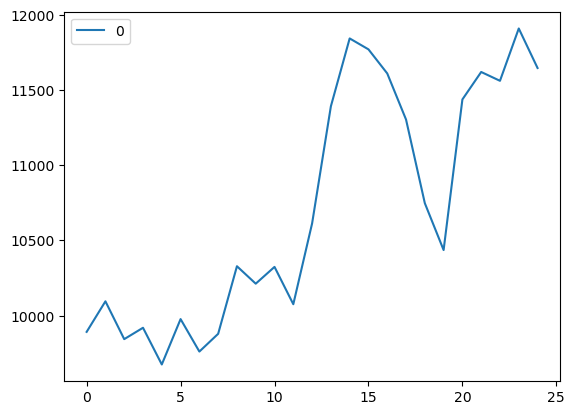

In [50]:
results_df.plot(kind="line")

# FBPROPHET VS LSTM

In [51]:
df3=df[:725]

In [52]:
df3.head(5)

,ds,y
0,2012-08-25,76
1,2012-08-26,88
2,2012-08-27,62
3,2012-08-28,58
4,2012-08-29,60


In [53]:
model_p2=Prophet()

In [54]:
m2=model_p2.fit(df3)

11:41:06 - cmdstanpy - INFO - Chain [1] start processing
11:41:06 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future=m2.make_future_dataframe(periods=25)

In [56]:
predict=m2.predict(future)

In [57]:
predict_df=predict[["yhat"]]

In [58]:
predict_df.head(5)

,yhat
0,-862.950925
1,-992.204882
2,498.268768
3,542.368944
4,489.934412


In [59]:
predict_df.shape

(750, 1)

In [60]:
predict_df2=predict_df.iloc[724:]

In [66]:
predict_df2.reset_index(inplace=True)

In [69]:
predict_df2.drop("index",inplace=True,axis=1)

C:\Users\Hi\AppData\Local\Temp\ipykernel_15028\255349748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df2.drop("index",inplace=True,axis=1)


In [70]:
predict_df2.head(5)

,yhat
0,9627.406777
1,9599.041830
2,9545.769993
3,9359.081278
4,8340.436722


In [71]:
results_df.head(5)

,0
0,9891.420898
1,10094.795898
2,9843.045898
3,9918.769531
4,9674.428711


In [72]:
results_concat=pd.concat([predict_df2,results_df],axis=1)

In [75]:
results_concat.rename(columns={0:"LSTM","yhat":"FBPROPHET"},inplace=True)

In [76]:
results_concat

,FBPROPHET,LSTM
0,9627.406777,9891.420898
1,9599.041830,10094.795898
2,9545.769993,9843.045898
3,9359.081278,9918.769531
4,8340.436722,9674.428711
5,8235.252350,9976.504883
6,9749.795585,9760.370117
7,9817.965346,9878.548828
8,9789.600399,10328.276367
9,9736.328562,10212.182617


<AxesSubplot:>

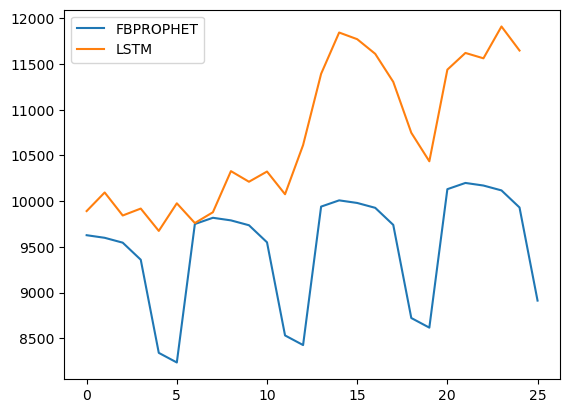

In [77]:
results_concat.plot()